# Image Classification with CNN using Keras

# Task 1: Import Libraries

In [19]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.0.1
Is using GPU? False


# Task 2: Preprocess Data

In [21]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [22]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()
x_train, y_train = get_three_classes(x_train, y_train)
x_test, y_test = get_three_classes(x_test, y_test)

print(x_train.shape, y_train.shape)

(15000, 32, 32, 3) (15000, 3)


In [9]:
#ruff
k=np.concatenate([[1,2,3],[4,5,6]], axis=0)
print(k)

print(y_train[0])

[1 2 3 4 5 6]
[1. 0. 0.]


# Task 3: Visualize Examples

In [10]:
class_names = ['aeroplane', 'car', 'bird']

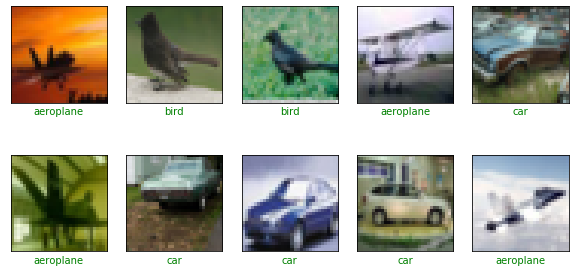

In [11]:
def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace= False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize=(10,5))
    for i in range(10):
        plt.subplot(2, 5, 1+i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col='green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])], color=col)
    plt.show()

show_random_examples(x_train, y_train, y_train)

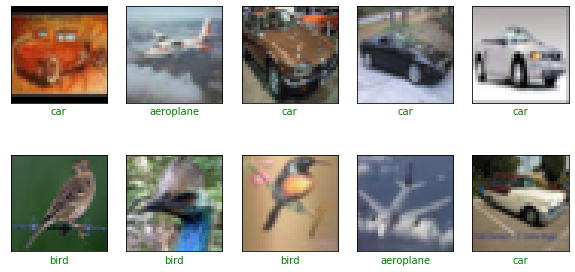

In [13]:
show_random_examples(x_test, y_test, y_test)

# Task 4: Create Model

In [14]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
    def add_conv_block(model, num_filters):
        model.add(Conv2D(num_filters, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation='relu'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.5))
        return model
    
    model=tf.keras.models.Sequential()
    model.add(Input(shape=(32, 32, 3)))
    
    model=add_conv_block(model, 32)
    model=add_conv_block(model, 64)
    model=add_conv_block(model, 128)
    
    model.add(Flatten())
    model.add(Dense(3, activation='softmax'))
    
    model.compile( optimizer='adam', loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
    return model


m=create_model()
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 64)        2

# Task 5: Train the Model

In [15]:
k = m.fit(x_train/255.0, y_train, validation_data=(x_test/255.0, y_test),
         epochs=10, batch_size=128,
         callbacks=[
             tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
             tf.keras.callbacks.ModelCheckpoint(
                 'models/model_{val_accuracy:.3f}.h5',
                 save_best_only=True, save_weights_only=False,
                 monitor='val_accuracy'
             )
         ]
    )

Train on 15000 samples, validate on 3000 samples
Epoch 1/10
15000/15000 [==============================] - 146s 10ms/sample - loss: 0.8818 - accuracy: 0.6795 - val_loss: 2.6697 - val_accuracy: 0.3333
Epoch 2/10
15000/15000 [==============================] - 143s 10ms/sample - loss: 0.5633 - accuracy: 0.7706 - val_loss: 2.3042 - val_accuracy: 0.4777
Epoch 3/10
15000/15000 [==============================] - 146s 10ms/sample - loss: 0.4836 - accuracy: 0.8083 - val_loss: 1.9323 - val_accuracy: 0.5020
Epoch 4/10
15000/15000 [==============================] - 142s 9ms/sample - loss: 0.4428 - accuracy: 0.8248 - val_loss: 1.3701 - val_accuracy: 0.5790
Epoch 5/10
15000/15000 [==============================] - 146s 10ms/sample - loss: 0.4012 - accuracy: 0.8416 - val_loss: 0.6269 - val_accuracy: 0.7603
Epoch 6/10
15000/15000 [==============================] - 145s 10ms/sample - loss: 0.3792 - accuracy: 0.8494 - val_loss: 0.4421 - val_accuracy: 0.8400
Epoch 7/10
15000/15000 [======================

# Task 6: Final Predictions

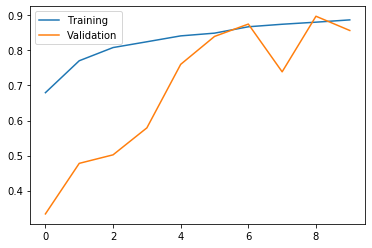

In [17]:
accuracy = k.history['accuracy']
validation_accuracy= k.history['val_accuracy']

plt.plot(range(len(accuracy)), accuracy, label='Training')
plt.plot(range(len(accuracy)), validation_accuracy, label='Validation')
plt.legend()
plt.show()

In [20]:
model = tf.keras.models.load_model('models/model_0.898.h5')

In [24]:
prediction = model.predict(x_test/255.0)

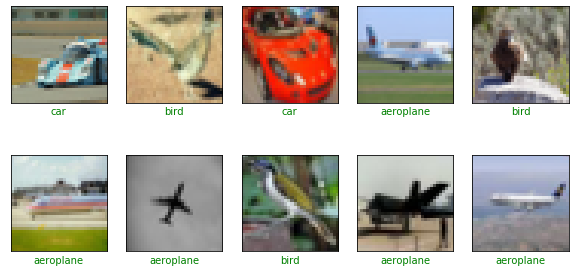

In [27]:
show_random_examples(x_test, y_test, prediction)